#  Part 1. Analysis of the 2018 NBI dataset

Each year bridge data is submitted to the FHWA by the States, Federal agencies and Tribal goverments of the United States of America. Each dataset is submitted in the spring, corrected and updated when necessary and finally published in the FHWA website (https://www.fhwa.dot.gov/bridge/nbi/ascii.cfm) at the end of each calendar year.

The purpose of this notebook is to analyze the latest FHWA Bridge Inventory dataset for all the bridges in the United States in the 2018 census.

This analysis will be developed for steel girder and concrete beam bridges, two of the most common deck typologies not only in USA but mainly in the world. 

We will explore the 2018 data and narrow the scope of this analysis by making some assumptions to focus on the topic we want to develop.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
pd.set_option('display.max_columns',None)

### Import Bridge data

We are creating a dataframe from the zip file obtained from FHWA dataset for all the bridges in the US National Bridge Inventory (NBIs) on 2018.

In [86]:
total18 = pd.read_csv('./data/2018hwybronefiledel.zip',compression = 'zip',sep = ',',encoding='latin-1')

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,5,7,17,31,36,37,38,39,71,73,75,96,98,102,107,108,109,123,124,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
total18.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_REF_055A,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,POSTING_EVAL_070,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_CODE_098A,OTHER_STATE_PCNT_098B,OTHR_STATE_STRUC_NO_099,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29,TRUCK_ADT,AGE
0,1,00000000000S702,1,6.0,1.0,04007,0.0,9,53.0,0.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4007',' 11.4KM NW OF ATMORE AL',99.99,1.500,0.0,0000000000,0.0,31061110.0,87341340.0,3,3,62,62,9,1999.0,2,0,50.0,2014.0,5,9.7,0,30,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,5,0.0,0.0,1,0.0,9.7,14.7,15.0,0.0,0.0,9.7,9.7,99.99,N,0.0,N,0.0,0.0,8,8,7,8,N,2,44.2,2,32.4,7,7,N,5.0,8,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,1,1.0,0,NaN,Y,8,59.0,2037.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,145.50,0.50,20.0
1,1,00000000000S703,1,6.0,1.0,04003,0.0,9,53.0,3004.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4003',' ON LYNN MCGEE ROAD',99.99,1.100,0.0,0000000000,0.0,31062020.0,87340890.0,3,3,62,62,9,2002.0,2,0,159.0,2017.0,5,6.5,0,0,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,1,0.0,0.0,1,0.0,9.7,12.9,13.6,0.3,0.3,9.1,9.8,99.99,N,0.0,N,0.0,0.0,8,8,7,7,N,2,84.2,2,34.8,7,6,N,5.0,7,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,8,1.0,0,NaN,Y,8,200.0,2034.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,133.28,1.59,17.0
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,0,113.0,27568.0,'UCHEE CREEK ',NaN,'101ST AIRBORNE RD ','3.4 KM S OF SUNSHINE RD ',99.99,0.000,0.0,NaN,NaN,32174328.0,84583800.0,18,3,74,74,9,1942.0,2,0,375.0,2017.0,4,10.4,0,0,0,0,0,1,1,5.0,0,0.0,0.0,A,1,5,1,4,0.0,0.0,3,0.0,7.2,18.3,43.0,0.6,0.6,7.2,9.0,99.99,N,0.0,N,0.0,0.0,5,5,6,6,N,2,51.7,2,37.2,5,4,N,5.0,8,6.0,38.0,1.0,52.8,1017.0,24.0,N,Y60,N,NaN,1017.0,NaN,1.0,1.0,2

In [4]:
total18.shape

(616096, 137)

There are 616096 bridges in this year's NBIs dataset and 137 columns with different features.

In [7]:
list(total18.columns)

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'RECORD_TYPE_005A',
 'ROUTE_PREFIX_005B',
 'SERVICE_LEVEL_005C',
 'ROUTE_NUMBER_005D',
 'DIRECTION_005E',
 'HIGHWAY_DISTRICT_002',
 'COUNTY_CODE_003',
 'PLACE_CODE_004',
 'FEATURES_DESC_006A',
 'CRITICAL_FACILITY_006B',
 'FACILITY_CARRIED_007',
 'LOCATION_009',
 'MIN_VERT_CLR_010',
 'KILOPOINT_011',
 'BASE_HWY_NETWORK_012',
 'LRS_INV_ROUTE_013A',
 'SUBROUTE_NO_013B',
 'LAT_016',
 'LONG_017',
 'DETOUR_KILOS_019',
 'TOLL_020',
 'MAINTENANCE_021',
 'OWNER_022',
 'FUNCTIONAL_CLASS_026',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'TRAFFIC_LANES_UND_028B',
 'ADT_029',
 'YEAR_ADT_030',
 'DESIGN_LOAD_031',
 'APPR_WIDTH_MT_032',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_FLARED_035',
 'RAILINGS_036A',
 'TRANSITIONS_036B',
 'APPR_RAIL_036C',
 'APPR_RAIL_END_036D',
 'HISTORY_037',
 'NAVIGATION_038',
 'NAV_VERT_CLR_MT_039',
 'NAV_HORR_CLR_MT_040',
 'OPEN_CLOSED_POSTED_041',
 'SERVICE_ON_042A',
 'SERVICE_UND_042B',
 'STRUCTURE_KIND_043A',
 '

The FHWA provides a "Recording and Coding Guide for the Structure Inventory and Appraisal of the Nations Bridges" in its website: https://www.fhwa.dot.gov/bridge/mtguide.pdf

This guides allows us to better understand those 137 features engineers use to code the bridges they are inspecting. 

### Clear and Merge Data

We will perform several filters in order to clear our data and get some useful insights. 
The filters will be developed from generic to more specific features.

We will also need to add columns and transform some variables.

Our filters and merge operations will be: 

    

    1) Selecting only bridges: the FHWA inventory includes data on both bridges and culverts.    

    2) Limit the dataset to bridges built after 1900: bridges built before ASTM standards (founded in 1898) would have had inconsistent standards for material acceptance in the bridge.
    
    3) Limit bridge length to 600ft: typical girder/beam bridges have 3 or 4 spans (remember the overpasses you see when driving on a highway) that are 40 meters long, that means 4*40 = 160 m = 525ft   
    
    4) Delete impossible data like year of reconstruction after current year.
    
    5) Selecting only the columns we will be interested in.

    6) Filtering only the bridges with steel girders and prestressed concrete decks.
    
    7) Group categories in some of the categorical variables

    8) Drop duplicates
    
    9) Focus in one climate zone of the USA for our study
    


In [11]:
#The culverts will be dropped out of our dataset
Image(url= "https://engineeringdiscoveries.com/2019/02/10/what-is-difference-between-bridge-and-culvert/what-is-difference-between-bridge-and-culvert-ohn/", width=500, height=500)

In [87]:
total18 = total18.loc[total18['CULVERT_COND_062'] == 'N']

In [88]:
total18.shape

(475464, 137)

In [89]:
#Drop bridges built before 1900 due to material standards

total18 = total18.loc[total18['YEAR_BUILT_027'] > 1900]

In [90]:
total18.shape

(470511, 137)

In [91]:
# Drop bridges that are more than 600ft long.

total18 = total18.loc[total18['STRUCTURE_LEN_MT_049'] < 600]

In [16]:
total18.shape

(467329, 137)

In [92]:
# Drop impossible data like year of reconstruction after year of last inspection (2018) 

total18['YEAR_RECONSTRUCTED_106'].fillna(0, inplace = True)
total18 = total18[total18['YEAR_RECONSTRUCTED_106'] < 2018]

In [93]:
total18.drop(total18[(total18['YEAR_RECONSTRUCTED_106']!=0) & (total18['YEAR_RECONSTRUCTED_106']<= total18['YEAR_BUILT_027'])].index, inplace = True)

In [95]:
total18.shape

(467243, 137)

In [96]:
# Add some features that are more easy to read

# Average daily traffic for trucks
total18['TRUCK_ADT'] = total18['ADT_029']*total18['PERCENT_ADT_TRUCK_109']/100

# Age of bridge:
# Will be calculated as 2019 (current year) - the year the bridge was built, unless the bridge has been reconstructed
# If the bridge has been reconstructed, Age will be 2019 - year of reconstruction

(total18['YEAR_RECONSTRUCTED_106']==0).value_counts()

In [98]:
# Age of bridge
#  Will be calculated as 2019 (current year) - the year the bridge was built

#total18['AGE'] = total18.apply(lambda row : (2019-row['YEAR_RECONSTRUCTED_106']) if row['YEAR_RECONSTRUCTED_106']>0 
#                               else (2019 - row['YEAR_BUILT_027']), axis =1)

total18['AGE'] = total18.apply(lambda row : (2019-row['YEAR_BUILT_027']), axis = 1)

In [208]:
# Let's select only the columns we will work with

descriptive_cols = ['STATE_CODE_001',
                    'STRUCTURE_NUMBER_008',
                    'LAT_016',
                    'LONG_017']

geometric_cols = ['TRAFFIC_LANES_ON_028A',
                  'DEGREES_SKEW_034',
                  'STRUCTURE_KIND_043A',
                  'STRUCTURE_TYPE_043B',
                  'MAIN_UNIT_SPANS_045',
                  'MAX_SPAN_LEN_MT_048',
                  'STRUCTURE_LEN_MT_049',
                  'DECK_WIDTH_MT_052',
                  'SURFACE_TYPE_108A']

functional_cols = ['YEAR_BUILT_027',
                   'YEAR_RECONSTRUCTED_106',
                   'AGE',
                   'DESIGN_LOAD_031',
                   'TRUCK_ADT']

operational_cols = ['MAINTENANCE_021',
                    'FUNCTIONAL_CLASS_026',
                    'WATERWAY_EVAL_071']

rating_cols = ['DECK_COND_058',
               'SUPERSTRUCTURE_COND_059',
               'SUBSTRUCTURE_COND_060']

In [100]:
cols_interest = descriptive_cols+geometric_cols+functional_cols+operational_cols+rating_cols
cols_interest

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'LAT_016',
 'LONG_017',
 'TRAFFIC_LANES_ON_028A',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_KIND_043A',
 'STRUCTURE_TYPE_043B',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'YEAR_BUILT_027',
 'YEAR_RECONSTRUCTED_106',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060']

In [181]:
# Let's reduce the dataset to those columns
total18_fil = total18[cols_interest]

In [27]:
total18_fil.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
0,1,00000000000S702,31061110.0,87341340.0,2,0,30,5,5,1,14.7,15.0,9.7,6,1999.0,0.0,20.0,5,0.50,62,9,8,8,8,7
1,1,00000000000S703,31062020.0,87340890.0,2,0,0,5,1,1,12.9,13.6,9.8,6,2002.0,0.0,17.0,5,1.59,62,9,7,8,8,7
2,1,0000000000M0022,32174328.0,84583800.0,2,0,0,1,4,3,18.3,43.0,9.0,1,1942.0,0.0,77.0,4,131.25,74,9,8,5,5,6
3,1,000000883039900,34270600.0,87581200.0,2,0,99,5,5,5,14.0,65.5,10.5,0,1974.0,0.0,45.0,5,15.00,67,8,9,7,7,7
8,1,000004504800350,34281800.0,86223000.0,2,0,0,1,4,1,18.3,19.2,8.2,6,1939.0,0.0,80.0,4,17.50,67,9,6,7,7,7


In [102]:
total18_fil.shape

(467243, 25)

In [103]:
total18_fil.dtypes

STATE_CODE_001               int64
STRUCTURE_NUMBER_008        object
LAT_016                    float64
LONG_017                   float64
TRAFFIC_LANES_ON_028A        int64
MEDIAN_CODE_033              int64
DEGREES_SKEW_034             int64
STRUCTURE_KIND_043A          int64
STRUCTURE_TYPE_043B          int64
MAIN_UNIT_SPANS_045          int64
MAX_SPAN_LEN_MT_048        float64
STRUCTURE_LEN_MT_049       float64
DECK_WIDTH_MT_052          float64
SURFACE_TYPE_108A           object
YEAR_BUILT_027             float64
YEAR_RECONSTRUCTED_106     float64
AGE                        float64
DESIGN_LOAD_031             object
TRUCK_ADT                  float64
MAINTENANCE_021              int64
FUNCTIONAL_CLASS_026         int64
WATERWAY_EVAL_071           object
DECK_COND_058               object
SUPERSTRUCTURE_COND_059     object
SUBSTRUCTURE_COND_060       object
dtype: object

In [30]:
object_cols = ['SURFACE_TYPE_108A','DESIGN_LOAD_031','WATERWAY_EVAL_071','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']

In [182]:
# Convert the columns with no type to numeric values
for col in object_cols:
    total18_fil[col] = pd.to_numeric(total18_fil[col], errors='coerce')
    total18_fil[col] = total18_fil[col].astype('float64')
    

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [105]:
total18_fil.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
0,1,00000000000S702,31061110.0,87341340.0,2,0,30,5,5,1,14.7,15.0,9.7,6.0,1999.0,0.0,20.0,5.0,0.50,62,9,8.0,8.0,8.0,7.0
1,1,00000000000S703,31062020.0,87340890.0,2,0,0,5,1,1,12.9,13.6,9.8,6.0,2002.0,0.0,17.0,5.0,1.59,62,9,7.0,8.0,8.0,7.0
2,1,0000000000M0022,32174328.0,84583800.0,2,0,0,1,4,3,18.3,43.0,9.0,1.0,1942.0,0.0,77.0,4.0,131.25,74,9,8.0,5.0,5.0,6.0
3,1,000000883039900,34270600.0,87581200.0,2,0,99,5,5,5,14.0,65.5,10.5,0.0,1974.0,0.0,45.0,5.0,15.00,67,8,9.0,7.0,7.0,7.0
8,1,000004504800350,34281800.0,86223000.0,2,0,0,1,4,1,18.3,19.2,8.2,6.0,1939.0,0.0,80.0,4.0,17.50,67,9,6.0,7.0,7.0,7.0


In [33]:
# We only want the bridges with steel girders and prestressed concrete beams
# Let's see first which values do the "STRUCTURE KIND" feature can take

total18_fil['STRUCTURE_KIND_043A'].unique()

array([5, 1, 3, 4, 2, 6, 7, 8, 0, 9])

In [34]:
# We only want beams or girders superstructures. 

total18_fil['STRUCTURE_TYPE_043B'].unique()

array([ 5,  1,  4, 22,  3,  2, 10, 12, 11,  7,  9,  0,  6, 21, 15,  8, 14,
       13, 17, 16, 20])

In [183]:
# The item codification is as follows: 
# 3 for steel, 4 for steel continuous, 5 for pre-stressed concrete and 6 for pre-stressed concrete continuous

total18_fil = total18_fil[(total18_fil['STRUCTURE_KIND_043A'].isin([3,4,5,6]))]

In [107]:
total18_fil.shape

(315916, 25)

In [184]:
# The item codification is 2 for stringer/multi-beam or girder

total18_fil = total18_fil[(total18_fil['STRUCTURE_TYPE_043B']==2)]
total18_fil.drop(['STRUCTURE_TYPE_043B'], axis=1, inplace = True)

In [172]:
total18_fil.shape

(217452, 24)

In [106]:
# Grouping categories in some variables

In [185]:
# Median on bridge - ITEM 33
code_median = {0:0,1:1,2:2,3:2}
total18_fil['MEDIAN_CODE_033'] = total18_fil['MEDIAN_CODE_033'].map(code_median)

In [186]:
# Structure Type - ITEM 43A
code_struc = {3:'steel',4:'steel',5:'concrete',6:'concrete'}
total18_fil['STRUCTURE_KIND_043A'] = total18_fil['STRUCTURE_KIND_043A'].map(code_struc)

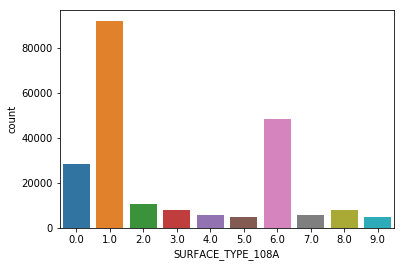

In [175]:
# Wearing surface - ITEM 108
sns.countplot(total18_fil['SURFACE_TYPE_108A'])

In [187]:
code_ws = {1:'concrete',2:'concrete',3:'concrete',4:'concrete',
          6:'bituminous', 0:'none'}

total18_fil['SURFACE_TYPE_108A'] = total18_fil['SURFACE_TYPE_108A'].map(code_ws)

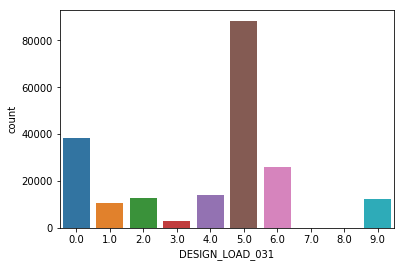

In [43]:
# Design Load - ITEM 31
sns.countplot(total18_fil['DESIGN_LOAD_031'])

In [188]:
code_truck = {0:'other',7:'other',8:'other',
              1:'light',2:'light',3:'light',4:'light',
              5:'heavy',6:'heavy',9:'heavy'}

total18_fil['DESIGN_LOAD_031'] = total18_fil['DESIGN_LOAD_031'].map(code_truck)

In [189]:
# Maintenanace Responsability - ITEM 21
code_resp = {1:'stateHA',2:'countyHA',3:'town_cityHA',4:'town_cityHA',31:'tollA',32:'tollA'}
total18_fil['MAINTENANCE_021'] = total18_fil['MAINTENANCE_021'].map(code_resp)
total18_fil['MAINTENANCE_021'].fillna('otherA', inplace = True)

In [191]:
# Functional Classification - ITEM 26
code_class = {1:'rural',2:'rural',6:'rural',7:'rural',8:'rural',9:'rural',
              11:'urban',12:'urban',14:'urban',16:'urban',17:'urban',19:'urban'}
total18_fil['FUNCTIONAL_CLASS_026'] = total18_fil['FUNCTIONAL_CLASS_026'].map(code_class)

In [192]:
# Waterway - ITEM 71
code_water = {9:'low',8:'low',
              7:'high',6:'high',5:'high',4:'high',3:'high',2:'high',
              np.nan:'none'}

total18_fil['WATERWAY_EVAL_071'] = total18_fil['WATERWAY_EVAL_071'].map(code_water)

In [193]:
# We will also change the Year reconstructed column with a pair of values:
# 1 if reconstruction has been necessary and 0 if not

total18_fil['RECONSTRUCTED'] = total18_fil.apply(lambda row: 1 if row['YEAR_RECONSTRUCTED_106']>0
                                                else 0, axis = 1)

In [194]:
# Finally the dataset we have obtained is as follows
total18_fil.shape

(217452, 25)

In [195]:
# Drop null values
total18_fil.dropna(inplace = True)

In [196]:
total18_fil.shape

(173988, 25)

In [197]:
# Convert the latitude and longitude dimensions to decimal degrees 

def conv_decdeg(num):
    a = pd.to_numeric(str(num)[:-6])
    b = pd.to_numeric((str(num)[-6:-4]))/60
    c = pd.to_numeric(str(num)[-4:])/(100*3600)
    val = (a+b+c)/100
    return val

def get_new_l(df,func):
    
    # Transform values to integers
    df['LONG_017'] = pd.to_numeric(df['LONG_017'],downcast = 'signed')
    df['LAT_016'] = pd.to_numeric(df['LAT_016'],downcast = 'signed')

    # Apply function to get values in decimal degrees
    df['LONGITUDE'] = -df['LONG_017'].apply(func)
    df['LATITUDE'] = df['LAT_016'].apply(func)
    
get_new_l(total18_fil,conv_decdeg)

In [198]:
# Drop coordinates outside the USA
total18_fil = total18_fil[total18_fil['LONGITUDE'].between(-175,-64)]
total18_fil = total18_fil[total18_fil['LATITUDE'].between(16,56)]

In [199]:
# Drop former longitude and latitude columns
total18_fil.drop(['LAT_016', 'LONG_017'], axis=1, inplace = True)

In [200]:
total18_fil.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,RECONSTRUCTED,LONGITUDE,LATITUDE
17,1,000013771700120,2,0,0,steel,1,17.7,18.9,9.8,bituminous,1958.0,0.0,61.0,heavy,253.4,otherA,urban,none,6.0,7.0,7.0,0,-87.390000,34.469000
25,1,000040,4,2,0,steel,1,8.2,8.2,44.5,bituminous,1910.0,0.0,109.0,other,130.0,town_cityHA,urban,none,4.0,4.0,4.0,0,-86.480833,33.308000
31,1,000050,2,0,20,steel,1,9.4,9.4,6.7,concrete,1910.0,1995.0,109.0,light,2.0,countyHA,rural,high,6.0,6.0,5.0,1,-86.372668,34.578835
33,1,000060,3,0,0,concrete,3,10.4,34.7,15.2,concrete,1994.0,0.0,25.0,heavy,7.6,town_cityHA,urban,none,7.0,7.0,7.0,0,-86.508000,34.103000
45,1,000083,1,0,20,steel,2,3.7,7.3,4.0,concrete,1914.0,0.0,105.0,heavy,0.0,countyHA,rural,high,8.0,7.0,5.0,0,-86.245834,34.533002


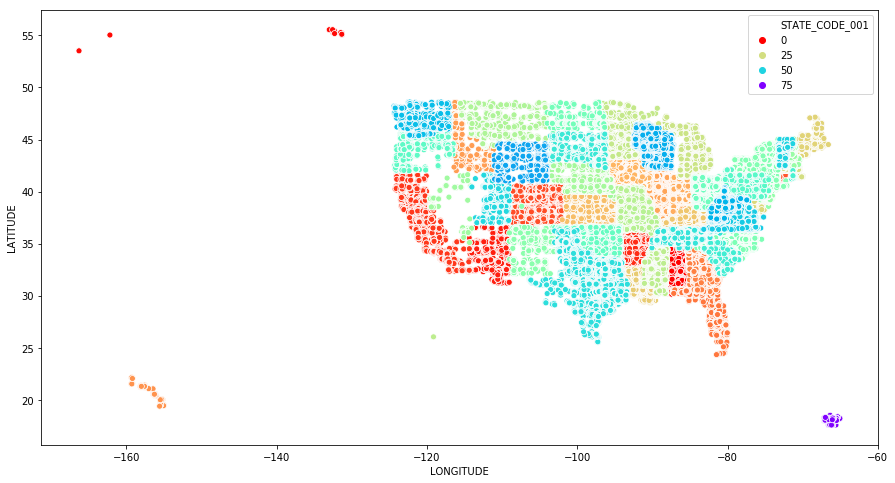

In [126]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE',data = total18_fil, hue='STATE_CODE_001',palette = 'rainbow_r')

The scatter plot of longitude and latitude looks like a United States map, including the islands like Hawaii and Puerto Rico, and also several points in Alaska.

In [201]:
categorical_cols = [ 'MEDIAN_CODE_033',
 'STRUCTURE_KIND_043A',
 'SURFACE_TYPE_108A',
 'DESIGN_LOAD_031',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060']

for col in categorical_cols:
    values = total18_fil[col].unique()
    print("The values of %s column are: %s" %(col, values))

The values of MEDIAN_CODE_033 column are: [0 2 1]
The values of STRUCTURE_KIND_043A column are: ['steel' 'concrete']
The values of SURFACE_TYPE_108A column are: ['bituminous' 'concrete' 'none']
The values of DESIGN_LOAD_031 column are: ['heavy' 'other' 'light']
The values of MAINTENANCE_021 column are: ['otherA' 'town_cityHA' 'countyHA' 'stateHA' 'tollA']
The values of FUNCTIONAL_CLASS_026 column are: ['urban' 'rural']
The values of WATERWAY_EVAL_071 column are: ['none' 'high' 'low']
The values of DECK_COND_058 column are: [6. 4. 7. 8. 5. 3. 9. 2. 0. 1.]
The values of SUPERSTRUCTURE_COND_059 column are: [7. 4. 6. 5. 3. 2. 8. 9. 0. 1.]
The values of SUBSTRUCTURE_COND_060 column are: [7. 4. 5. 6. 2. 3. 8. 9. 1. 0.]


In [202]:
# Since we are looking for joining all the datasets with this one by using the Structure number, we should first check that there are no duplicates on it

total18_fil['STRUCTURE_NUMBER_008'].duplicated().value_counts()

False    166209
True       7447
Name: STRUCTURE_NUMBER_008, dtype: int64

In [138]:
dupl_rows = total18_fil[total18_fil.duplicated(['STRUCTURE_NUMBER_008'])]
dupl_rows.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,RECONSTRUCTED,LONGITUDE,LATITUDE
22989,4,7596,6,0,10,concrete,1,19.5,20.7,26.3,concrete,1988.0,0.0,31.0,heavy,412.0,4.0,urban,low,7.0,7.0,7.0,0,-112.059669,33.343002
22992,4,7599,6,0,21,concrete,1,27.1,27.7,25.5,concrete,1978.0,0.0,41.0,heavy,1507.6,4.0,urban,low,6.0,7.0,7.0,0,-111.586335,33.393668
23011,4,7630,3,0,4,concrete,3,31.7,96.0,17.7,concrete,1989.0,1996.0,30.0,heavy,2350.0,4.0,urban,high,7.0,7.0,7.0,1,-110.595835,32.080334
23289,4,7960,2,0,0,concrete,16,27.4,411.2,19.1,concrete,1991.0,0.0,28.0,heavy,932.9,4.0,urban,none,7.0,7.0,7.0,0,-112.000002,33.261001
23301,4,7976,1,0,0,concrete,8,27.4,192.0,5.5,concrete,1991.0,0.0,28.0,heavy,796.7,4.0,urban,none,7.0,7.0,7.0,0,-112.001335,33.261001


In [131]:
state_name = {25:'MASSACHUSETTS',
             4:'ARIZONA', 
             8:'COLORADO',
             38:'NORTH DAKOTA', 
             9:'CONNECTICUT', 
             19:'IOWA', 
             26:'MICHIGAN', 
             48:'TEXAS',
             35:'NEW MEXICO',
             17:'ILLINOIS', 
             51:'VIRGINIA',
             23:'MAINE',
             16:'IDAHO',
             36:'NEW YORK',
             56:'WYOMING',
             29:'MISSOURI',
             39:'OHIO',
             28:'MISSISSIPI', 
             11:'DISTRICT OF COLOMBIA',
             21:'KENTUCKY', 
             18:'INDIANA',
             6:'CALIFORNIA',
             47:'TENNESSEE', 
             12:'FLORIDA',
             24:'MARYLAND',
             34:'NEW JERSEY', 
             46:'SOUTH DAKOTA',
             13:'GEORGIA',
             55:'WISCONSIN',
             30:'MONTANA',
             54:'WEST VIGINIA',
             15:'HAWAII', 
             32:'NEVADA', 
             37:'NORTH CAROLINA',
             10:'DELAWARE', 
             33:'NEW HAMPSHIRE', 
             44:'RHODE ISLAND',
             50:'VERMONT', 
             42:'PENNSYLVANIA', 
             5:'ARKANSAS', 
             20:'KANSAS', 
             45:'SOUTH CAROLINA',
             22:'LOUISIANA',
             40:'OKLAHOMA', 
             72:'PUERTO RICO', 
             41:'OREGON',
             21:'MINNESOTA', 
             53:'WASHINGTON', 
             1:'ALABAMA', 
             31:'NEBRASKA',
             2:'ALASKA', 
             49:'UTAH'
               }

In [132]:
dupl_rows['STATE_NAME'] =  dupl_rows['STATE_CODE_001'].map(state_name)
dupl_rows['STATE_NAME'].value_counts()

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


VIRGINIA          2106
PENNSYLVANIA      1732
SOUTH CAROLINA    1244
MISSOURI           763
IOWA               414
MICHIGAN           404
NORTH CAROLINA     238
RHODE ISLAND       152
INDIANA            123
NEW MEXICO         120
ARKANSAS            56
ARIZONA             22
IDAHO               14
OHIO                11
NEW YORK             9
KANSAS               6
OKLAHOMA             4
MAINE                4
NEW JERSEY           3
PUERTO RICO          2
SOUTH DAKOTA         2
TEXAS                1
Name: STATE_NAME, dtype: int64

In [152]:
(100*dupl_rows.groupby('STATE_CODE_001').count()/total18_fil.groupby('STATE_CODE_001').count()).dropna()['STRUCTURE_NUMBER_008'].sort_values(ascending = False)

STATE_CODE_001
45    47.699387
44    39.175258
51    38.592633
42    30.692894
35    11.881188
26    11.386697
29     6.862128
19     5.849110
37     2.938634
18     2.482842
4      1.794454
5      1.621309
16     1.516793
27     1.178101
23     0.419727
46     0.280112
20     0.215905
72     0.179533
39     0.148468
36     0.116944
34     0.092937
40     0.047636
48     0.005910
Name: STRUCTURE_NUMBER_008, dtype: float64

In South Carolina almost half of the bridges were duplicated (48%). We are also loosing a big part of the data in Pennsylvania and Rhode Island.

In [143]:
# Before dropping all the duplicated values, let's calculate the percentage of data lost

(100*dupl_rows.groupby('STATE_CODE_001').count()/total18_fil.groupby('STATE_CODE_001').count()).dropna()['STRUCTURE_NUMBER_008'].describe()

count    23.000000
mean      8.920809
std      14.752282
min       0.005910
25%       0.197719
50%       1.621309
75%       9.124412
max      47.699387
Name: STRUCTURE_NUMBER_008, dtype: float64

However, the median of loss is less than 2% of the bridges, so will drop the duplicated values.

In [203]:
# Drop duplicates

total18_fil.drop_duplicates(subset='STRUCTURE_NUMBER_008', inplace = True)

In [204]:
total18_fil.shape

(166209, 25)

# Save to csv

total18_fil.to_csv (r'./total18_fil.csv', index = None, header=True)

The United States are divided into 8 different climate zones and 3 moisture categories. The climate region definitions are based on heating degree days, average temperatures, and precipitation and divide the US map as follows according to energy.gov website: 

<img src = './Determining Climate Regions by County .png'>

We will focus in analysing one climate region of the USA. For this project purpose, we will take Zone 5 with Moist type A, also called Cold regions. 

With this filter we will be evaluating the following states (from left to right on the green region): Nebraska (31), Iowa (19), Ohio (39) and Pennsylvania (42). 

We will drop Illinois and Indiana from the list since only half of their territory is in this climate zone.

In [161]:
# Let's see how many bridges we have from each state

total18_fil['STATE_CODE_001'].map(state_name).value_counts().head(15)

TEXAS             16919
MISSOURI          10356
OKLAHOMA           8393
NORTH CAROLINA     7861
NEW YORK           7687
OHIO               7398
IOWA               6664
ILLINOIS           6149
WISCONSIN          5310
GEORGIA            5046
MISSISSIPI         5018
NEBRASKA           4998
INDIANA            4831
TENNESSEE          4469
PENNSYLVANIA       3911
Name: STATE_CODE_001, dtype: int64

In [205]:
total18_clim = total18_fil[total18_fil['STATE_CODE_001'].isin([31,19,39,42])]

In [206]:
total18_clim.sample(10)

,STATE_CODE_001,STRUCTURE_NUMBER_008,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,RECONSTRUCTED,LONGITUDE,LATITUDE
180538,19,000000000600390,2,0,10,concrete,3,17.4,50.6,13.3,concrete,1971.0,0.0,48.0,heavy,4343.50,stateHA,urban,none,6.0,7.0,6.0,0,-91.385003,41.422000
465597,42,38568,3,1,99,steel,6,18.6,103.6,16.9,concrete,1975.0,0.0,44.0,heavy,4899.18,stateHA,urban,none,6.0,7.0,6.0,0,-75.084501,39.572003
320914,31,C002001525,2,0,0,steel,1,9.4,9.8,7.9,concrete,1974.0,0.0,45.0,other,0.00,countyHA,rural,high,5.0,7.0,7.0,0,-96.531000,41.520000
405466,39,5201322,2,0,20,steel,3,13.7,37.7,13.4,concrete,1958.0,1990.0,61.0,heavy,721.92,stateHA,rural,low,7.0,7.0,7.0,1,-82.008834,41.027334
328112,31,C007911510,2,0,45,steel,3,15.2,32.0,9.8,concrete,2003.0,0.0,16.0,heavy,12.00,countyHA,rural,low,5.0,8.0,8.0,0,-103.558000,41.587000
398827,39,3031500,1,0,34,steel,1,7.6,7.9,4.2,bituminous,1930.0,2009.0,89.0,heavy,6.72,countyHA,rural,high,7.0,7.0,6.0,1,-81.421334,40.053502
406003,39,5404142,2,0,0,steel,3,25.9,68.3,11.0,concrete,1953.0,1994.0,66.0,heavy,22.64,stateHA,rural,low,7.0,7.0,7.0,1,-84.311168,40.406000
328423,31,C008116705,2,0,0,steel,3,18.3,37.2,7.3,concrete,1978.0,0.0,41.0,other,0.00,countyHA,rural,low,8.0,8.0,8.0,0,-102.087000,42.403000
159821,19,27841,2,0,45,steel,3,47.5,123.7,11.9,concrete,1993.0,0.0,26.0,heavy,227.20,countyHA,rural,low,7.0,7.0,8.0,0,-95.537335,41.374336
159193,19,000000000020021,2,0,15,concrete,2,36.9,74.7,13.2,concrete,2009.0,0.0,10.0,heavy,396.00,stateHA,rural,none,7.0,8.0,8.0,0,-93.476834,41.015835


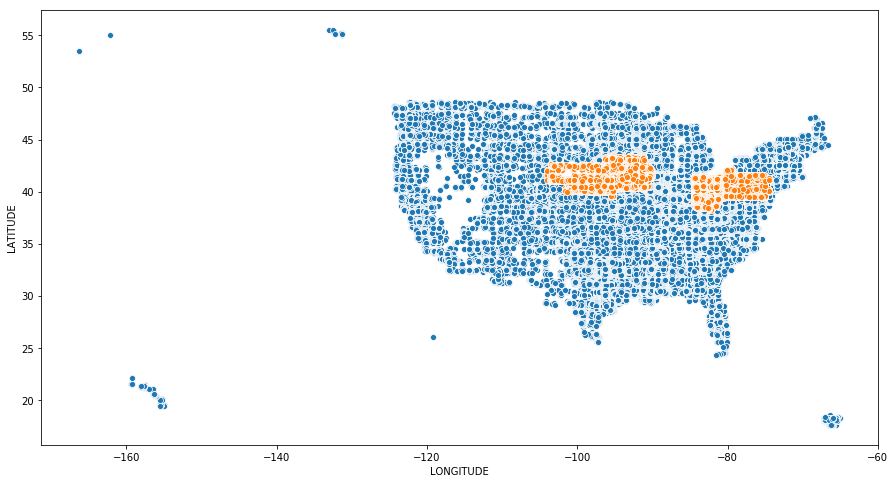

In [76]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE',data = total18_fil)
sns.scatterplot(x='LONGITUDE', y='LATITUDE',data = total18_clim)

In [207]:
total18_clim.to_csv (r'./total18_clim.csv', index = None, header=True)